# Exercice DataViz Toulouse #2

## A - Quelles sont les ventes de la société ACME

In [253]:
import pandas as pd
import numpy as np

In [254]:
ACME = {'janv':[592301], 'févr':[549159], 'mars':[496366],'avr':[514132],'mai':[479974],'juin':[456553],'juil':[597346],'août':[435399],'sept':[533541],'oct':[456671],'nov':[537764],'déc':[499542]}
df = pd.DataFrame(ACME, columns=['janv','févr','mars','avr','mai','juin','juil','août','sept','oct','nov','déc'])
df.set_index([['Ventes  € HT']],inplace=True)
df

,janv,févr,mars,avr,mai,juin,juil,août,sept,oct,nov,déc
Ventes € HT,592301,549159,496366,514132,479974,456553,597346,435399,533541,456671,537764,499542


In [255]:
df['Total']=df.sum(axis=1)
df

,janv,févr,mars,avr,mai,juin,juil,août,sept,oct,nov,déc,Total
Ventes € HT,592301,549159,496366,514132,479974,456553,597346,435399,533541,456671,537764,499542,6148748


In [256]:
tot = df['Total'][0]
tot

6148748

In [257]:
tot = df['Total'][0]
df_perc=100*df[['janv','févr','mars','avr','mai','juin','juil','août','sept','oct','nov','déc']]/tot
df_perc

,janv,févr,mars,avr,mai,juin,juil,août,sept,oct,nov,déc
Ventes € HT,9.632872,8.931233,8.072635,8.361572,7.806044,7.425138,9.714921,7.0811,8.67723,7.427057,8.745911,8.124288


In [258]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0



Matplotlib version:  3.0.2


In [259]:
df1=df.drop(['Total'], axis=1).transpose()
df1

,Ventes € HT
janv,592301
févr,549159
mars,496366
avr,514132
mai,479974
juin,456553
juil,597346
août,435399
sept,533541
oct,456671


In [260]:
df1.describe()

,Ventes € HT
count,12.000000
mean,512395.666667
std,51937.126693
min,435399.000000
25%,474148.250000
50%,506837.000000
75%,540612.750000
max,597346.000000


In [261]:
df1['Ventes  € HT'].transpose

<bound method IndexOpsMixin.transpose of janv    592301
févr    549159
mars    496366
avr     514132
mai     479974
juin    456553
juil    597346
août    435399
sept    533541
oct     456671
nov     537764
déc     499542
Name: Ventes  € HT, dtype: int64>

No handles with labels found to put in legend.


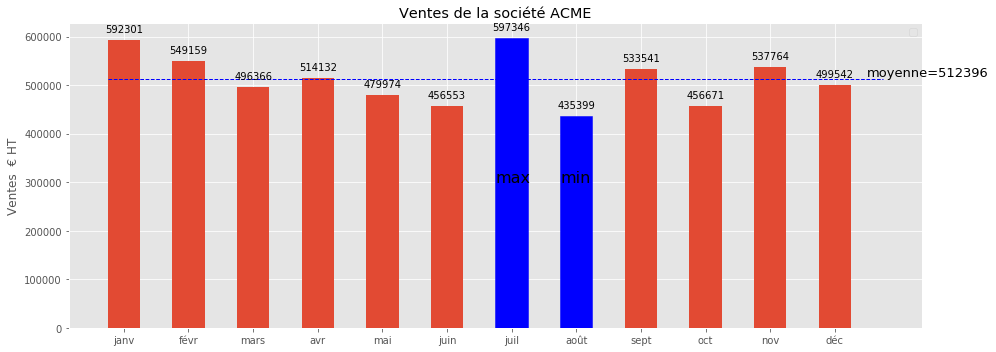

In [262]:
labels = ['janv','févr','mars','avr','mai','juin','juil','août','sept','oct','nov','déc']
vals = df1['Ventes  € HT']

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

mean1 = df1.mean()[0]
x1 = np.arange(-width/2,len(labels),1)
y1 = np.ones_like(x1)*mean1
#num_items = 4
#margin = 1
#width = (1.-2.*margin)/num_items

fig, ax = plt.subplots(figsize=(14, 5))

rects1 = ax.bar(x, vals, width)#, label='Men')
#rects2 = ax.bar(x + width/2, women_means, width)#, label='Women')

ln = ax.plot(x1,y1,'b--', linewidth=1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ventes  € HT')
ax.set_title('Ventes de la société ACME')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
meanrnd=int(round(mean1))
ax.annotate('moyenne='+'{:d}'.format(meanrnd), (len(labels)-width, 1.01*mean1),fontsize=13)

listvals = list(vals)
max_ventes = max(listvals)
max_index = listvals.index(max_ventes)
min_ventes = min(listvals)
min_index = listvals.index(min_ventes)
ax.get_children()[min_index].set_color('b') 
ax.get_children()[max_index].set_color('b') 
ax.annotate('min',xy=(ax.get_children()[min_index].get_x(), 300000), fontsize=16)
ax.annotate('max',xy=(ax.get_children()[max_index].get_x(), 300000), fontsize=16)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:d}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 6),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')
            
autolabel(rects1)

fig.tight_layout()

plt.savefig('Ventes de la société ACME.jpg', dpi=300)

plt.show()

## B - Quelles sont les ventes de la société ACME

In [263]:
ACME = {'janv':[563302,3755], 'févr':[478221,3191], 'mars':[508495,3395],'avr':[424872,2839],'mai':[494350,3295],
        'juin':[591851,3946],'juil':[535010,3574],'août':[503385,3357],'sept':[599721,3999],'oct':[587857,3926],
        'nov':[599603,4006],'déc':[595346,3977]}
df = pd.DataFrame(ACME, columns=['janv','févr','mars','avr','mai','juin','juil','août','sept','oct','nov','déc'])
df.set_index([['Ventes € HT','Ventes #']],inplace=True)
df

,janv,févr,mars,avr,mai,juin,juil,août,sept,oct,nov,déc
Ventes € HT,563302,478221,508495,424872,494350,591851,535010,503385,599721,587857,599603,595346
Ventes #,3755,3191,3395,2839,3295,3946,3574,3357,3999,3926,4006,3977


In [264]:
prix = pd.DataFrame(df.loc['Ventes € HT']/df.loc['Ventes #'])
prix.columns=['prix']
prix

,prix
janv,150.013848
févr,149.865559
mars,149.777614
avr,149.655513
mai,150.030349
juin,149.987582
juil,149.695020
août,149.950849
sept,149.967742
oct,149.734335


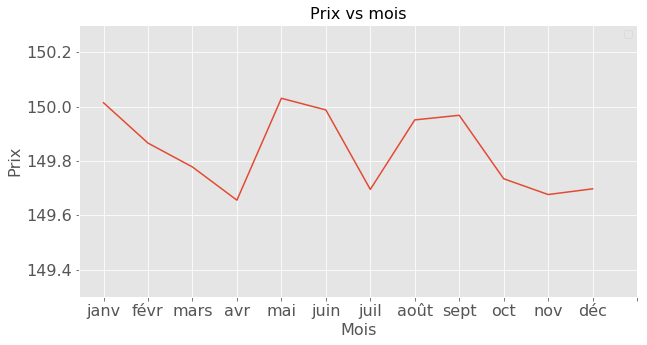

In [265]:
ax = prix.plot(kind='line',xticks=np.arange(0,13,1),figsize=(10, 5))
ax.set_xticklabels(prix.index)
ax.set_ylabel('Prix')
ax.set_xlabel('Mois')
ax.legend('')
ax.set_title('Prix vs mois')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

ax.set_ylim(149.3,150.3)
plt.savefig('Prix vs mois.jpg', dpi=300)
plt.show()

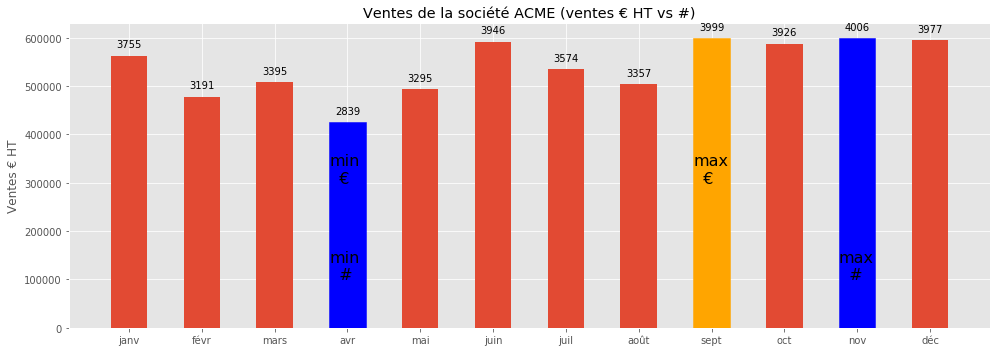

In [266]:
labels = ['janv','févr','mars','avr','mai','juin','juil','août','sept','oct','nov','déc']
vals = df.loc['Ventes € HT']
vals2 = df.loc['Ventes #']

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 5))

rects1 = ax.bar(x, vals, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ventes € HT')
ax.set_title('Ventes de la société ACME (ventes € HT vs #)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()

listvals = list(vals)
max_ventes = max(listvals)
max_index = listvals.index(max_ventes)
min_ventes = min(listvals)
min_index = listvals.index(min_ventes)
ax.get_children()[min_index].set_color('orange') 
ax.get_children()[max_index].set_color('orange') 
ax.annotate('min\n  €',xy=(ax.get_children()[min_index].get_x(), 300000), fontsize=16)
ax.annotate('max\n  €',xy=(ax.get_children()[max_index].get_x(), 300000), fontsize=16)

listvals2 = list(vals2)
max_ventes2 = max(listvals2)
max_index2 = listvals2.index(max_ventes2)
min_ventes2 = min(listvals2)
min_index2 = listvals2.index(min_ventes2)
ax.get_children()[min_index2].set_color('b') 
ax.get_children()[max_index2].set_color('b') 
ax.annotate('min\n  #',xy=(ax.get_children()[min_index2].get_x(), 100000), fontsize=16)
ax.annotate('max\n  #',xy=(ax.get_children()[max_index2].get_x(), 100000), fontsize=16)


def autolabel(rects,nums):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate('{:d}'.format(int(nums[i])),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 6),  # vertical offset
            textcoords="offset points",
            ha='center', va='bottom')
    

autolabel(rects1,vals2)

fig.tight_layout()

plt.savefig('Ventes de la société ACME (ventes eur HT vs num).jpg', dpi=300)

plt.show()

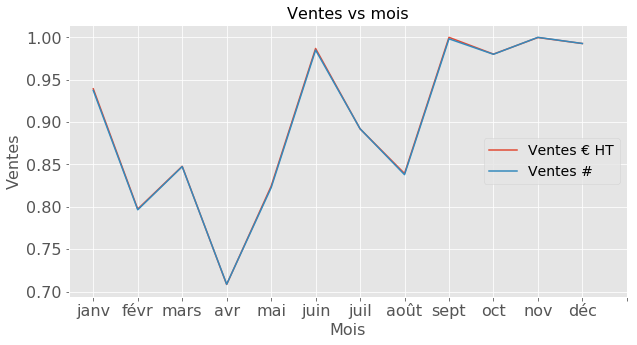

In [267]:

ventes = pd.DataFrame([df.loc['Ventes € HT']/max(df.loc['Ventes € HT']),df.loc['Ventes #']/max(df.loc['Ventes #'])])
#prix.index={'prix zone A','prix zone B'}
#ventes.set_index([['prix zone A','prix zone B']],inplace=True)
ventesT = ventes.transpose()
ax = ventesT.plot(kind='line',xticks=np.arange(0,13,1),figsize=(10, 5))
ax.set_xticklabels(ventesT.index)
ax.set_ylabel('Ventes')
ax.set_xlabel('Mois')
plt.legend(loc=5,fontsize=14)

ax.set_title('Ventes vs mois')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

#ax.set_ylim(149.3,150.3)
plt.savefig('Ventes vs mois Exercise 2B.jpg', dpi=300)
plt.show()



In [268]:
ventes

,janv,févr,mars,avr,mai,juin,juil,août,sept,oct,nov,déc
Ventes € HT,0.939273,0.797406,0.847886,0.708449,0.824300,0.986877,0.892098,0.839365,1.000000,0.980217,0.999803,0.992705
Ventes #,0.937344,0.796555,0.847479,0.708687,0.822516,0.985022,0.892162,0.837993,0.998253,0.980030,1.000000,0.992761


## C - Quelles sont les ventes de la société ACME

In [269]:
ACME = {'janv':[1022997,6828,455787,3040,567210,3788], 
        'févr':[1007800,6729,440058,2940,567742,3789,], 
        'mars':[971863,6490,432528,2891,539335,3599],
        'avr':[893583,5961,416172,2778,477411,3183,],
        'mai':[862944,5768,402341,2689,460603,3079],
        'juin':[947741,6333,516955,3452,430786,2881,],
        'juil':[1063741,7107,495455,3309,568286,3798],
        'août':[1091935,7295,587298,3924,504637,3371],
        'sept':[957816,6387,510610,3405,447206,2982],
        'oct':[914535,6108,419252,2803,495283,3305],
        'nov':[959041,6402,468247,3123,490794,3279],
        'déc':[1052474,7024,513577,3428,538897,3596]}
df = pd.DataFrame(ACME, columns=['janv','févr','mars','avr','mai','juin','juil','août','sept','oct','nov','déc'])
df.set_index([['Ventes € HT','Ventes #','Zone A € HT','Ventes zone A #','Zone B € HT','Ventes zone B #']],inplace=True)
df



,janv,févr,mars,avr,mai,juin,juil,août,sept,oct,nov,déc
Ventes € HT,1022997,1007800,971863,893583,862944,947741,1063741,1091935,957816,914535,959041,1052474
Ventes #,6828,6729,6490,5961,5768,6333,7107,7295,6387,6108,6402,7024
Zone A € HT,455787,440058,432528,416172,402341,516955,495455,587298,510610,419252,468247,513577
Ventes zone A #,3040,2940,2891,2778,2689,3452,3309,3924,3405,2803,3123,3428
Zone B € HT,567210,567742,539335,477411,460603,430786,568286,504637,447206,495283,490794,538897
Ventes zone B #,3788,3789,3599,3183,3079,2881,3798,3371,2982,3305,3279,3596


In [270]:
df.sum(axis=1)

Ventes € HT        11746470
Ventes #              78432
Zone A € HT         5658280
Ventes zone A #       37782
Zone B € HT         6088190
Ventes zone B #       40650
dtype: int64

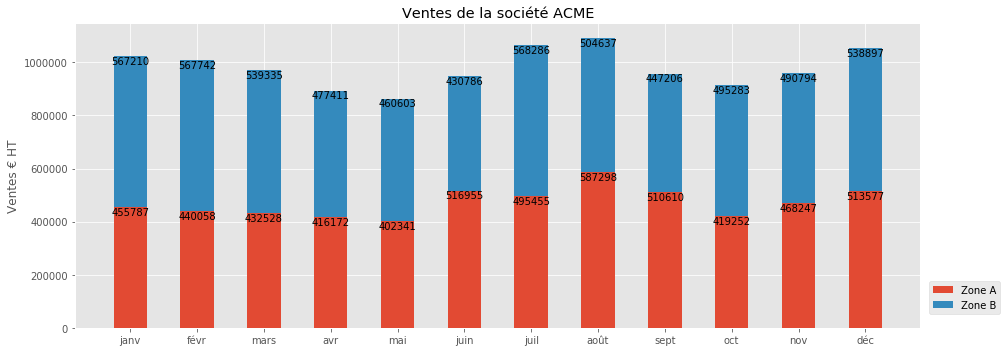

In [271]:
labels = ['janv','févr','mars','avr','mai','juin','juil','août','sept','oct','nov','déc']
vals = df.loc['Zone A € HT']
vals2 = df.loc['Zone B € HT']

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 5))

rects1 = ax.bar(x, vals, width)#, label='Men')
rects2 = ax.bar(x, vals2, width, bottom=vals)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ventes € HT')
ax.set_title('Ventes de la société ACME')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend((rects1,rects2), ('Zone A','Zone B'),loc='center right', bbox_to_anchor=(1.1, 0.1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        bottom = rect.get_y()
        ax.annotate('{:d}'.format(int(height)),
            xy=(rect.get_x() + rect.get_width() / 2, height+bottom),
            xytext=(0, -10),  # vertical offset
            textcoords="offset points",
            ha='center', va='bottom')         


        
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('Ventes de la société ACME zone A et zone B.jpg', dpi=300)

plt.show()

In [272]:
listA = df.loc['Zone A € HT']/df.loc['Ventes zone A #']
listB = df.loc['Zone B € HT']/df.loc['Ventes zone B #']
prixAB = (listA.mean()+listB.mean())/2

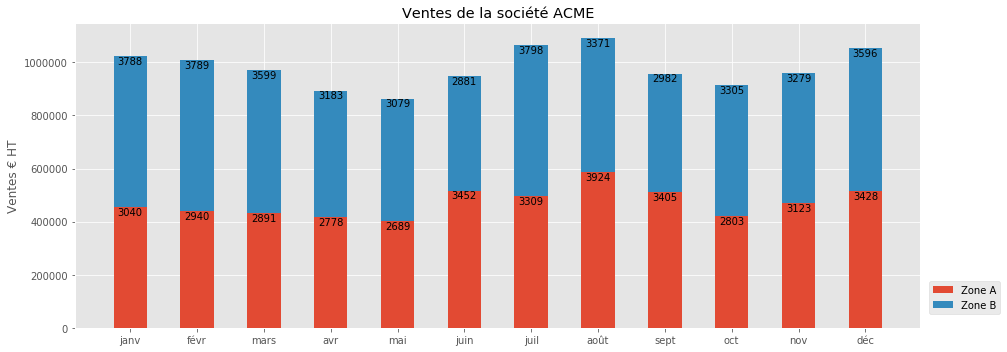

In [273]:
labels = ['janv','févr','mars','avr','mai','juin','juil','août','sept','oct','nov','déc']
valsA = df.loc['Zone A € HT']
valsB = df.loc['Zone B € HT']
numsA = df.loc['Ventes zone A #']
numsB = df.loc['Ventes zone B #']

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 5))

rects1 = ax.bar(x, valsA, width)#, label='Men')
rects2 = ax.bar(x, valsB, width, bottom=valsA)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ventes € HT')
ax.set_title('Ventes de la société ACME')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend((rects1,rects2), ('Zone A','Zone B'),loc='center right', bbox_to_anchor=(1.1, 0.1))

def autolabel(rects,nums):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for (rect,num) in zip(rects,nums):
        height = rect.get_height()
        bottom = rect.get_y()
        
        ax.annotate('{:d}'.format(num),
            xy=(rect.get_x() + rect.get_width() / 2, height+bottom),
            xytext=(0, -10),  # vertical offset
            textcoords="offset points",
            ha='center', va='bottom')         


        
autolabel(rects1,numsA)
autolabel(rects2,numsB)

fig.tight_layout()

plt.savefig('Ventes de la société ACME zone A et zone B avec num.jpg', dpi=300)

plt.show()

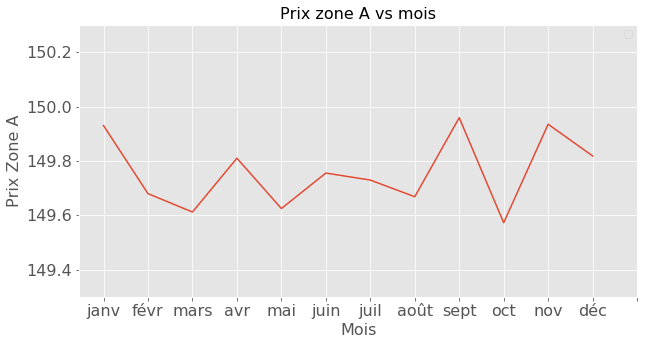

In [274]:
prixA = pd.DataFrame(df.loc['Zone A € HT']/df.loc['Ventes zone A #'])
prixA.columns=['prix zone A']

ax = prixA.plot(kind='line',xticks=np.arange(0,13,1),figsize=(10, 5))
ax.set_xticklabels(prixA.index)
ax.set_ylabel('Prix Zone A')
ax.set_xlabel('Mois')
ax.legend('')
ax.set_title('Prix zone A vs mois')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

ax.set_ylim(149.3,150.3)
plt.savefig('Prix zone A vs mois.jpg', dpi=300)
plt.show()

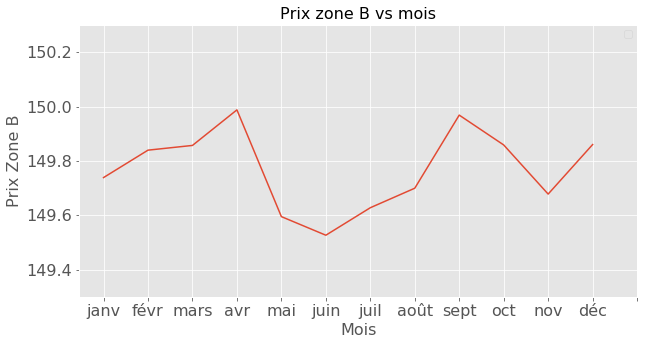

In [275]:
prixB = pd.DataFrame(df.loc['Zone B € HT']/df.loc['Ventes zone B #'])
prixB.columns=['prix zone B']

ax = prixB.plot(kind='line',xticks=np.arange(0,13,1),figsize=(10, 5))
ax.set_xticklabels(prixB.index)
ax.set_ylabel('Prix Zone B')
ax.set_xlabel('Mois')
ax.legend('')
ax.set_title('Prix zone B vs mois')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

ax.set_ylim(149.3,150.3)
plt.savefig('Prix zone B vs mois.jpg', dpi=300)
plt.show()

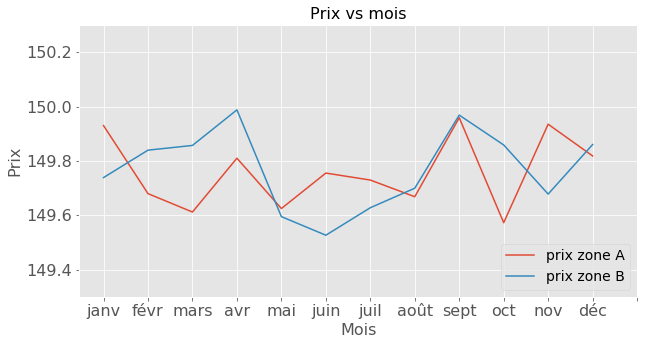

In [276]:
prix = pd.DataFrame([df.loc['Zone A € HT']/df.loc['Ventes zone A #'],df.loc['Zone B € HT']/df.loc['Ventes zone B #']])
#prix.index={'prix zone A','prix zone B'}
prix.set_index([['prix zone A','prix zone B']],inplace=True)
prixT = prix.transpose()
ax = prixT.plot(kind='line',xticks=np.arange(0,13,1),figsize=(10, 5))
ax.set_xticklabels(prixT.index)
ax.set_ylabel('Prix')
ax.set_xlabel('Mois')
plt.legend(loc=4,fontsize=14)

ax.set_title('Prix vs mois')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

ax.set_ylim(149.3,150.3)
plt.savefig('Prix vs mois.jpg', dpi=300)
plt.show()



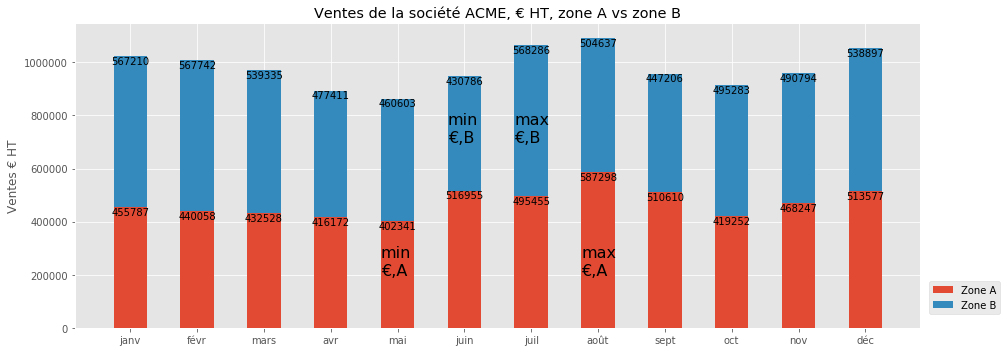

In [277]:
labels = ['janv','févr','mars','avr','mai','juin','juil','août','sept','oct','nov','déc']
valsA = df.loc['Zone A € HT']
valsB = df.loc['Zone B € HT']

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 5))

rects1 = ax.bar(x, valsA, width)#, label='Men')
rects2 = ax.bar(x, valsB, width, bottom=valsA)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ventes € HT')
ax.set_title('Ventes de la société ACME, € HT, zone A vs zone B')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend((rects1,rects2), ('Zone A','Zone B'),loc='center right', bbox_to_anchor=(1.1, 0.1))


listvalsA = list(valsA)
max_A = max(listvalsA)
max_indexA = listvalsA.index(max_A)
min_A = min(listvalsA)
min_indexA = listvalsA.index(min_A)
ax.annotate('min\n€,A',xy=(ax.get_children()[min_indexA].get_x(), 200000), fontsize=16)
ax.annotate('max\n€,A',xy=(ax.get_children()[max_indexA].get_x(), 200000), fontsize=16)

listvalsB = list(valsB)
max_B = max(listvalsB)
max_indexB = listvalsB.index(max_B)
min_B = min(listvalsB)
min_indexB = listvalsB.index(min_B)
ax.annotate('min\n€,B',xy=(ax.get_children()[min_indexB].get_x(), 700000), fontsize=16)
ax.annotate('max\n€,B',xy=(ax.get_children()[max_indexB].get_x(), 700000), fontsize=16)



def autolabel(rects,nums):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for (rect,num) in zip(rects,nums):
        height = rect.get_height()
        bottom = rect.get_y()
        
        ax.annotate('{:d}'.format(num),
            xy=(rect.get_x() + rect.get_width() / 2, height+bottom),
            xytext=(0, -10),  # vertical offset
            textcoords="offset points",
            ha='center', va='bottom')         


        
autolabel(rects1,valsA)
autolabel(rects2,valsB)

fig.tight_layout()

plt.savefig('Ventes de la société ACME zone A et zone B ONLY EUR.jpg', dpi=300)

plt.show()

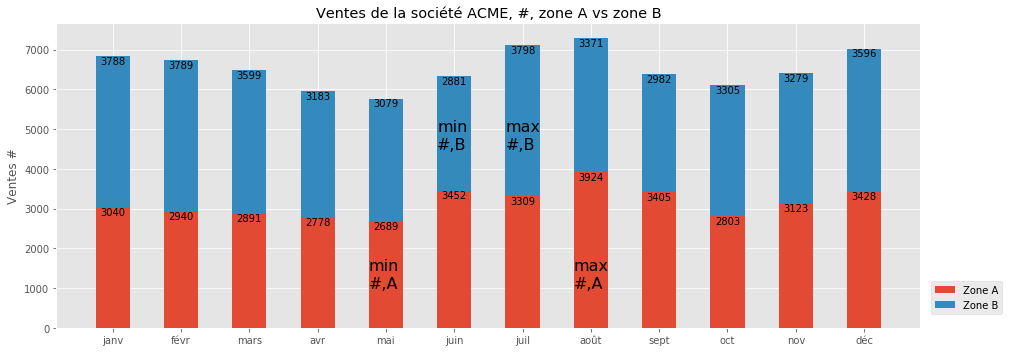

In [278]:
labels = ['janv','févr','mars','avr','mai','juin','juil','août','sept','oct','nov','déc']
valsA = df.loc['Ventes zone A #']
valsB = df.loc['Ventes zone B #']

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 5))

rects1 = ax.bar(x, valsA, width)#, label='Men')
rects2 = ax.bar(x, valsB, width, bottom=valsA)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ventes #')
ax.set_title('Ventes de la société ACME, #, zone A vs zone B')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend((rects1,rects2), ('Zone A','Zone B'),loc='center right', bbox_to_anchor=(1.1, 0.1))


listvalsA = list(valsA)
max_A = max(listvalsA)
max_indexA = listvalsA.index(max_A)
min_A = min(listvalsA)
min_indexA = listvalsA.index(min_A)
ax.annotate('min\n#,A',xy=(ax.get_children()[min_indexA].get_x(), 1000), fontsize=16)
ax.annotate('max\n#,A',xy=(ax.get_children()[max_indexA].get_x(), 1000), fontsize=16)

listvalsB = list(valsB)
max_B = max(listvalsB)
max_indexB = listvalsB.index(max_B)
min_B = min(listvalsB)
min_indexB = listvalsB.index(min_B)
ax.annotate('min\n#,B',xy=(ax.get_children()[min_indexB].get_x(), 4500), fontsize=16)
ax.annotate('max\n#,B',xy=(ax.get_children()[max_indexB].get_x(), 4500), fontsize=16)



def autolabel(rects,nums):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for (rect,num) in zip(rects,nums):
        height = rect.get_height()
        bottom = rect.get_y()
        
        ax.annotate('{:d}'.format(num),
            xy=(rect.get_x() + rect.get_width() / 2, height+bottom),
            xytext=(0, -10),  # vertical offset
            textcoords="offset points",
            ha='center', va='bottom')         


        
autolabel(rects1,valsA)
autolabel(rects2,valsB)

fig.tight_layout()

plt.savefig('Ventes de la société ACME zone A et zone B ONLY NUM.jpg', dpi=300)

plt.show()

In [279]:
df

,janv,févr,mars,avr,mai,juin,juil,août,sept,oct,nov,déc
Ventes € HT,1022997,1007800,971863,893583,862944,947741,1063741,1091935,957816,914535,959041,1052474
Ventes #,6828,6729,6490,5961,5768,6333,7107,7295,6387,6108,6402,7024
Zone A € HT,455787,440058,432528,416172,402341,516955,495455,587298,510610,419252,468247,513577
Ventes zone A #,3040,2940,2891,2778,2689,3452,3309,3924,3405,2803,3123,3428
Zone B € HT,567210,567742,539335,477411,460603,430786,568286,504637,447206,495283,490794,538897
Ventes zone B #,3788,3789,3599,3183,3079,2881,3798,3371,2982,3305,3279,3596


In [280]:
df.loc['prix zone A'] = df.loc['Zone A € HT']/df.loc['Ventes zone A #']
df.loc['prix zone B'] = df.loc['Zone B € HT']/df.loc['Ventes zone B #']
df

,janv,févr,mars,avr,mai,juin,juil,août,sept,oct,nov,déc
Ventes € HT,1.022997e+06,1.007800e+06,971863.000000,893583.000000,862944.000000,947741.000000,1.063741e+06,1.091935e+06,957816.000000,914535.000000,959041.000000,1.052474e+06
Ventes #,6.828000e+03,6.729000e+03,6490.000000,5961.000000,5768.000000,6333.000000,7.107000e+03,7.295000e+03,6387.000000,6108.000000,6402.000000,7.024000e+03
Zone A € HT,4.557870e+05,4.400580e+05,432528.000000,416172.000000,402341.000000,516955.000000,4.954550e+05,5.872980e+05,510610.000000,419252.000000,468247.000000,5.135770e+05
Ventes zone A #,3.040000e+03,2.940000e+03,2891.000000,2778.000000,2689.000000,3452.000000,3.309000e+03,3.924000e+03,3405.000000,2803.000000,3123.000000,3.428000e+03
Zone B € HT,5.672100e+05,5.677420e+05,539335.000000,477411.000000,460603.000000,430786.000000,5.682860e+05,5.046370e+05,447206.000000,495283.000000,490794.000000,5.388970e+05
Ventes zone B #,3.788000e+03,3.789000e+03,3599.000000,3183.000000,3079.000000,2881.000000,3.798000e+03,3.371000e+03,2982.000000,3305.000000,3279.000000,3.596000e+03
prix zone A,1.499299e+02,1.496796e+02,149.611899,149.809935,149.624768,149.755214,1.497295e+02,1.496682e+02,149.958884,149.572601,149.934998,1.498183e+02
prix zone B,1.497386e+02,1.498395e+02,149.856905,149.987747,149.594998,149.526553,1.496277e+02,1.496995e+02,149.968478,149.858699,149.677951,1.498601e+02


In [281]:
dfT = df.transpose()
dfT

,Ventes € HT,Ventes #,Zone A € HT,Ventes zone A #,Zone B € HT,Ventes zone B #,prix zone A,prix zone B
janv,1022997.0,6828.0,455787.0,3040.0,567210.0,3788.0,149.929934,149.738648
févr,1007800.0,6729.0,440058.0,2940.0,567742.0,3789.0,149.679592,149.839535
mars,971863.0,6490.0,432528.0,2891.0,539335.0,3599.0,149.611899,149.856905
avr,893583.0,5961.0,416172.0,2778.0,477411.0,3183.0,149.809935,149.987747
mai,862944.0,5768.0,402341.0,2689.0,460603.0,3079.0,149.624768,149.594998
juin,947741.0,6333.0,516955.0,3452.0,430786.0,2881.0,149.755214,149.526553
juil,1063741.0,7107.0,495455.0,3309.0,568286.0,3798.0,149.729526,149.627699
août,1091935.0,7295.0,587298.0,3924.0,504637.0,3371.0,149.668196,149.699496
sept,957816.0,6387.0,510610.0,3405.0,447206.0,2982.0,149.958884,149.968478
oct,914535.0,6108.0,419252.0,2803.0,495283.0,3305.0,149.572601,149.858699


In [282]:
dfT[['Ventes zone A #','Zone A € HT']].corr()

,Ventes zone A #,Zone A € HT
Ventes zone A #,1.000000,0.999972
Zone A € HT,0.999972,1.000000


In [283]:
dfT[['prix zone B','Ventes zone B #']].corr()

,prix zone B,Ventes zone B #
prix zone B,1.000000,0.095454
Ventes zone B #,0.095454,1.000000


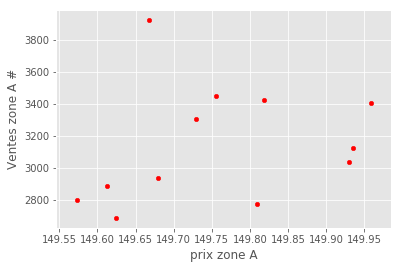

In [284]:
dfT[['Ventes zone A #','prix zone A']].plot(kind='scatter',x='prix zone A',y='Ventes zone A #',color='red')
plt.show()

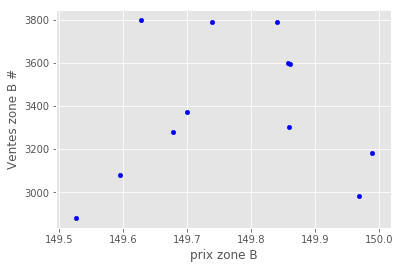

In [285]:
dfT[['Ventes zone B #','prix zone B']].plot(kind='scatter',x='prix zone B',y='Ventes zone B #',color='blue')
plt.show()

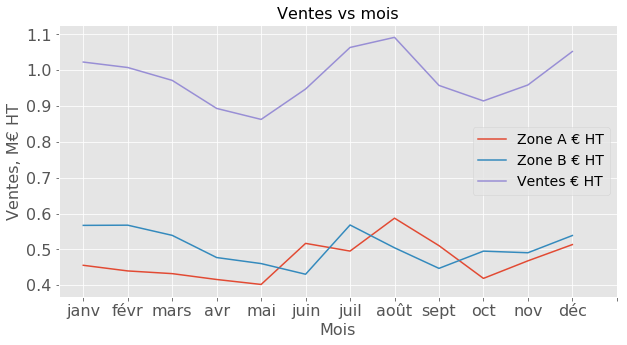

In [286]:
ventes = pd.DataFrame([df.loc['Zone A € HT']/1000000,df.loc['Zone B € HT']/1000000,df.loc['Ventes € HT']/1000000])
#prix.index={'prix zone A','prix zone B'}
#ventes.set_index([['prix zone A','prix zone B']],inplace=True)
ventesT = ventes.transpose()
ax = ventesT.plot(kind='line',xticks=np.arange(0,13,1),figsize=(10, 5))
ax.set_xticklabels(ventesT.index)
ax.set_ylabel('Ventes, M€ HT')
ax.set_xlabel('Mois')
plt.legend(loc=5,fontsize=14)

ax.set_title('Ventes vs mois')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

#ax.set_ylim(149.3,150.3)
plt.savefig('Ventes ALL vs mois.jpg', dpi=300)
plt.show()



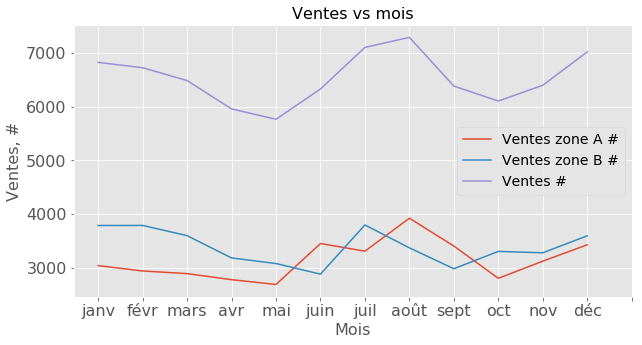

In [287]:
ventesNUM = pd.DataFrame([df.loc['Ventes zone A #'],df.loc['Ventes zone B #'],df.loc['Ventes #']])
#prix.index={'prix zone A','prix zone B'}
#ventes.set_index([['prix zone A','prix zone B']],inplace=True)
ventesNUMT = ventesNUM.transpose()
ax = ventesNUMT.plot(kind='line',xticks=np.arange(0,13,1),figsize=(10, 5))
ax.set_xticklabels(ventesNUMT.index)
ax.set_ylabel('Ventes, #')
ax.set_xlabel('Mois')
plt.legend(loc=5,fontsize=14)

ax.set_title('Ventes vs mois')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

#ax.set_ylim(149.3,150.3)
plt.savefig('Ventes NUM vs mois.jpg', dpi=300)
plt.show()



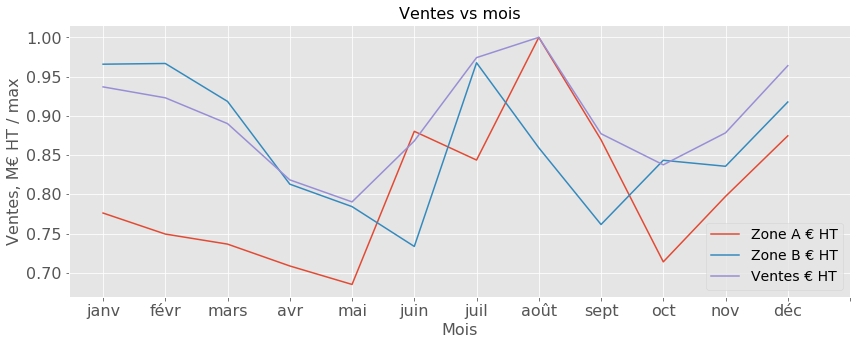

In [301]:
ventes = pd.DataFrame([df.loc['Zone A € HT']/max(df.loc['Zone A € HT']),
                       df.loc['Zone B € HT']/max(df.loc['Zone A € HT']),
                       df.loc['Ventes € HT']/max(df.loc['Ventes € HT'])])
#prix.index={'prix zone A','prix zone B'}
#ventes.set_index([['prix zone A','prix zone B']],inplace=True)
ventesT = ventes.transpose()
ax = ventesT.plot(kind='line',xticks=np.arange(0,13,1),figsize=(14, 5))
ax.set_xticklabels(ventesT.index)
ax.set_ylabel('Ventes, M€ HT / max')
ax.set_xlabel('Mois')
plt.legend(loc=4,fontsize=14)

ax.set_title('Ventes vs mois')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

#ax.set_ylim(149.3,150.3)
plt.savefig('Ventes ALL vs mois SCALED.jpg', dpi=300)
plt.show()


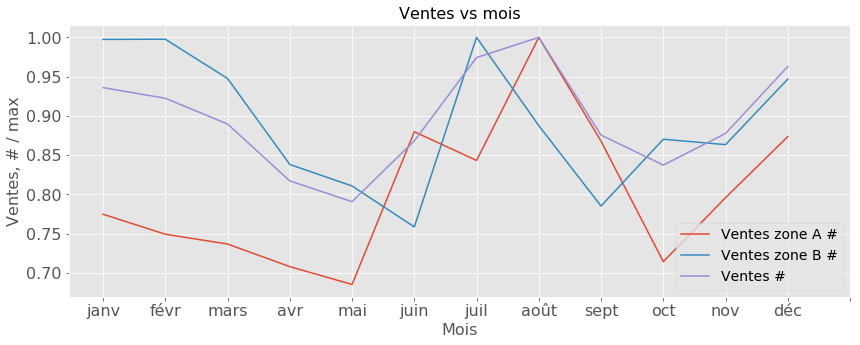

In [302]:
ventesNUM = pd.DataFrame([df.loc['Ventes zone A #']/max(df.loc['Ventes zone A #']),
                          df.loc['Ventes zone B #']/max(df.loc['Ventes zone B #']),
                          df.loc['Ventes #']/max(df.loc['Ventes #'])])
#prix.index={'prix zone A','prix zone B'}
#ventes.set_index([['prix zone A','prix zone B']],inplace=True)
ventesNUMT = ventesNUM.transpose()
ax = ventesNUMT.plot(kind='line',xticks=np.arange(0,13,1),figsize=(14, 5))
ax.set_xticklabels(ventesNUMT.index)
ax.set_ylabel('Ventes, # / max')
ax.set_xlabel('Mois')
plt.legend(fontsize=14)

ax.set_title('Ventes vs mois')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

#ax.set_ylim(149.3,150.3)
plt.savefig('Ventes NUM vs mois SCALED.jpg', dpi=300)
plt.show()

